# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# importng the dataset

In [2]:
dataset=pd.read_csv("CardioGoodFitness.csv")
dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Finding any missing values

In [6]:
dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
## there are no missing values

# Splitting data into independent and dependent variables

In [9]:
dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [10]:
X=pd.get_dummies(dataset[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage'
                          , 'Income', 'Miles']])
y=dataset[[ 'Fitness']]

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      180 non-null    int64
 1   Education                180 non-null    int64
 2   Usage                    180 non-null    int64
 3   Income                   180 non-null    int64
 4   Miles                    180 non-null    int64
 5   Product_TM195            180 non-null    uint8
 6   Product_TM498            180 non-null    uint8
 7   Product_TM798            180 non-null    uint8
 8   Gender_Female            180 non-null    uint8
 9   Gender_Male              180 non-null    uint8
 10  MaritalStatus_Partnered  180 non-null    uint8
 11  MaritalStatus_Single     180 non-null    uint8
dtypes: int64(5), uint8(7)
memory usage: 8.4 KB


In [13]:
X.head()

,Age,Education,Usage,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,29562,112,1,0,0,0,1,0,1
1,19,15,2,31836,75,1,0,0,0,1,0,1
2,19,14,4,30699,66,1,0,0,1,0,1,0
3,19,12,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,35247,47,1,0,0,0,1,1,0


In [14]:
y.head()

,Fitness
0,4
1,3
2,3
3,3
4,2


# Splitting dataset into training and test set 80/10/10

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.1,
                                              random_state=20)

# Training the logistic regression model on the trainng set

In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train)

c:\Anaconda3_2021.05\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Anaconda3_2021.05\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediciting a new validation set 
-age:22

-eduaction:14

-usage:2

-income:30699

-miles:112

-product_M195:0

-Product_M498:1

-Product_M798:0

-female:0

-male:1

-partnered:0

-single:1

In [51]:
X_test.columns

Index(['Age', 'Education', 'Usage', 'Income', 'Miles', 'Product_TM195',
       'Product_TM498', 'Product_TM798', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Partnered', 'MaritalStatus_Single'],
      dtype='object')

In [52]:
print(classifier.predict([[22,14,2,30699,112,0,1,0,0,1,0,1]]))

[3]


# Making the Confusion Matrix

In [53]:
y_pred=classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[3 1 0 0]
 [0 9 0 1]
 [0 2 0 0]
 [0 0 0 2]]


disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.75      0.86         4
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2

    accuracy                           0.78        18
   macro avg       0.60      0.66      0.62        18
weighted avg       0.71      0.78      0.73        18



c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Splitting data 70/15/15

In [57]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,
                                          test_size=.15,
                                          random_state=30)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train)

c:\Anaconda3_2021.05\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Anaconda3_2021.05\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred=classifier.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2 0 0 0]
 [0 8 0 1]
 [0 2 0 0]
 [0 0 0 2]]


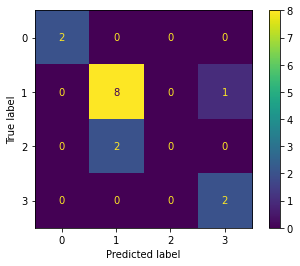

In [62]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.80      0.80      0.80         5
           3       0.80      0.94      0.86        17
           4       0.00      0.00      0.00         2
           5       1.00      0.83      0.91         6

    accuracy                           0.83        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.79      0.83      0.81        30



c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Splitting data 80/10/10

In [71]:
X_train,X_rest,y_train,y_rest=train_test_split(X_test,y_test,
                                          test_size=.1,
                                          random_state=20)

In [72]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_test.values,y_test)

c:\Anaconda3_2021.05\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [73]:
y_pred=classifier.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2 0 0 0]
 [0 8 0 1]
 [0 2 0 0]
 [0 1 0 1]]


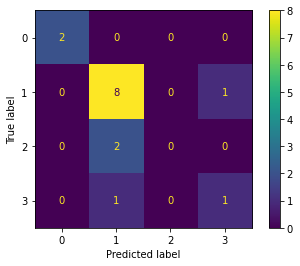

In [75]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       0.73      0.89      0.80         9
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         2

    accuracy                           0.73        15
   macro avg       0.56      0.60      0.57        15
weighted avg       0.64      0.73      0.68        15



c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3_2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
